In [2]:
#import the os module to interact with the operating system
import os

#define the rename and function
def rename_dataset(old_path, new_path):
    try:
        os.rename(old_path, new_path)
        print(f"File renamed from {old_path} to {new_path}")
    except FileNotFoundError:
        print(f"File not found: {old_path}")
    except Exception as e:
        print(f"An error occurred: {e}")


old_dataset_path = 'netflix_data.csv'
new_dataset_path = 'Netflix_shows_movies.csv'

rename_dataset(old_dataset_path, new_dataset_path)

File renamed from netflix_data.csv to Netflix_shows_movies.csv


In [6]:
import pandas as pd

# Load the dataset
Netflix_shows_movies = pd.read_csv('Netflix_shows_movies.csv')



# Data Exploration and statistical analysis
print(Netflix_shows_movies.head())
print(Netflix_shows_movies.describe())
Netflix_shows_movies.info()


    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  Un

In [10]:
# the 'listed_in' column contains the movie genre, so i will rename the column to 'genre'
Netflix_shows_movies.rename(columns={'listed_in': 'genre'}, inplace = True)

Netflix_shows_movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

In [12]:
# dealing with missing values

#the following columns have missing values [ director, cast, country, date added, and rating]
# to fix the missing values  (in director, cast, country, and date_added columns) we will input a place holder 'unknown'

Netflix_shows_movies.fillna({'director': 'unknown', 'cast': 'unknown', 'country': 'unknown', 'date_added': 'unknown'}, inplace= True)

# fixing the missing values in rating
# we will fill the missing values in rating based on the genre
# first we will get the mode of rating on each genre
genre_rating_mode= Netflix_shows_movies.groupby('genre')['rating'].agg(lambda x: x.mode()[0] if not x.mode().empty else'unknown')

#then we fill missing values in rating based on the mode rating in the genre
Netflix_shows_movies['rating'] =Netflix_shows_movies.apply(lambda row: 
genre_rating_mode[row['genre']] if pd.isnull (row['rating']) else row ['rating'], axis =1)

#verify changes
Netflix_shows_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      6234 non-null   object
 4   cast          6234 non-null   object
 5   country       6234 non-null   object
 6   date_added    6234 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6234 non-null   object
 9   duration      6234 non-null   object
 10  genre         6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [14]:
# Creating visualization
#import the needed libraries

import seaborn as sns
import matplotlib.pyplot as plt


Netflix_shows_movies.nunique()


show_id         6234
type               2
title           6172
director        3302
cast            5470
country          555
date_added      1525
release_year      72
rating            14
duration         201
genre            461
description     6226
dtype: int64

C:\Users\idehe\AppData\Local\Temp\ipykernel_13748\1888696526.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='viridis')


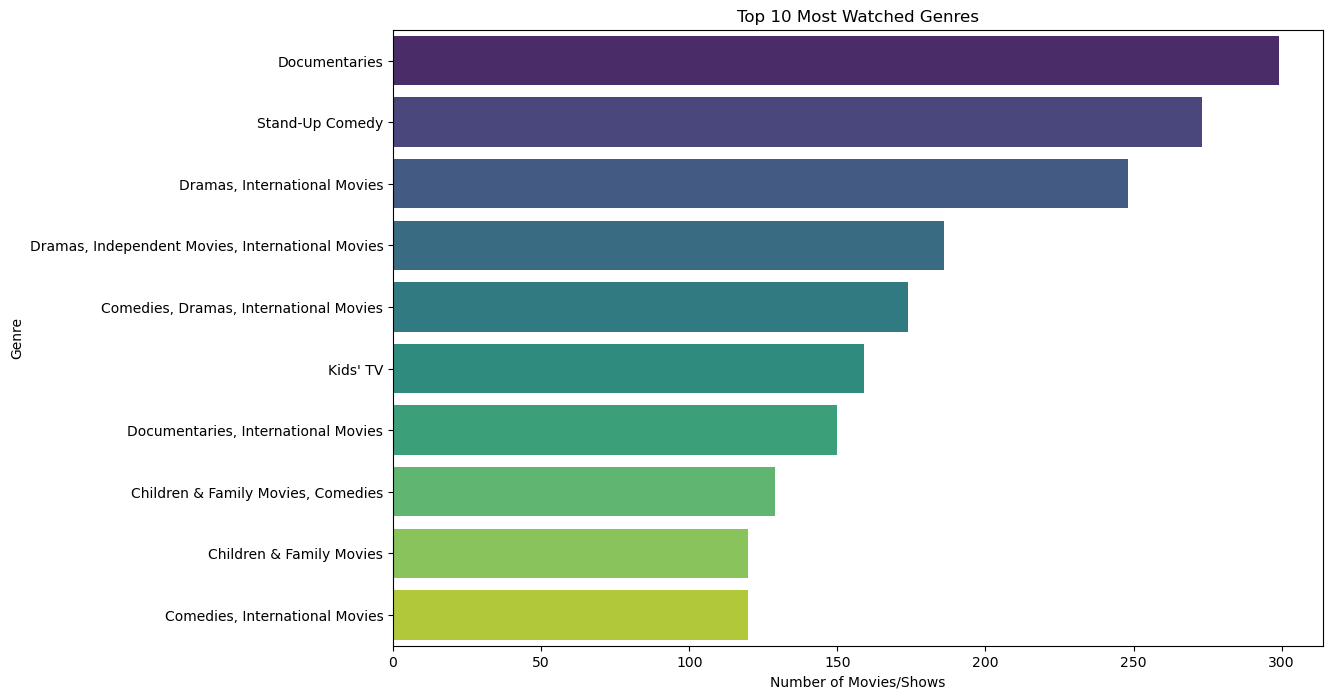

In [16]:
# the genre column contains more than 400 unique values and will not make sense if we plot everything
#so we will plot only 10 most watched genre

# Count the occurrences of each genre
genre_counts = Netflix_shows_movies['genre'].value_counts()

# Plot the top 10 most watched genres
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='viridis')
plt.title('Top 10 Most Watched Genres')
plt.xlabel('Number of Movies/Shows')
plt.ylabel('Genre')
plt.show()

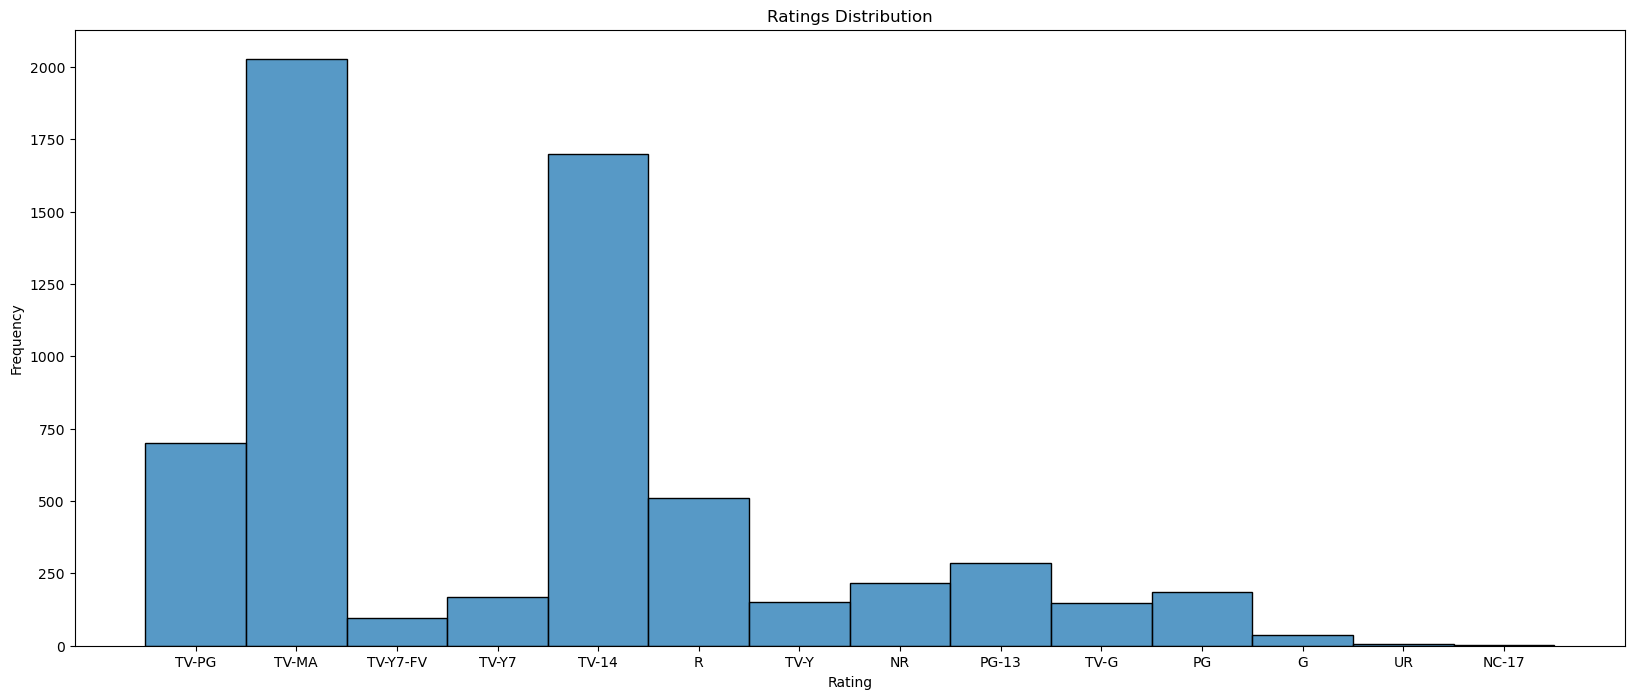

In [18]:

# Ratings distribution
plt.figure(figsize=(20,8))
sns.histplot(Netflix_shows_movies['rating'], bins=10)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [20]:
# the most watched genre is documentaries
#the rating with the highest frequency is 'TV-MA'

In [22]:
# Save the data to a CSV file
Netflix_shows_movies.to_csv('Netflix_movies_shows1.csv', index = 1)